# K-Means Clustering & Schools.csv

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."  
  
Jordan Martin

## Background
You will act as a data analyst/scientist in this HW. A data analytics project involves several steps
or phases: business understanding, data understanding, data preparation, data visualization,
model building, model evaluation, and model deployment. You have learned what these steps are
and what activities you need to be involved during each step or phase. Now, it is your turn to
apply your knowledge/skills into this HW.


This HW is designed to help you master the concepts and techniques for clustering analysis,
which is a popular unsupervised machine learning. Your client is in education and wants to
analyze the data (schools.csv) of over 1,800 schools in the United States. The goal is to develop
insights (or find hidden patterns) from the data.


This HW is semi-open ended. This is an individual HW. As a data analyst/scientist, you need to
be creative and eager to find something valuable from the dataset provided.

Hint: Handle missing values before clustering analysis.

# Import packages & data (schools.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

df = pd.read_csv('schools.csv')

# Data Preparation 

- Drop two columns ('School_Code', 'School_Name')
- Handle missing values

In [2]:
df = df.drop(['School_Code','School_Name'],1)
df.dtypes

Pct_First_Language_Not_English      float64
Pct_English_Language_Learner        float64
Pct_Students_With_Disabilities      float64
Pct_High_Needs                      float64
Pct_Economically_Disadvantaged      float64
Pct_African_American                float64
Pct_Asian                           float64
Pct_Hispanic                        float64
Pct_White                           float64
Pct_Native_American                 float64
Pct_Native_Hawaiian_Pacific_Isla    float64
Pct_MultiRace_NonHispanic           float64
Pct_Males                           float64
Pct_Females                         float64
Average_Class_Size                  float64
dtype: object

In [3]:
# initiating list of bad rows
badRows = []
# go through each row
for index, row in df.iterrows():
    colNum = 0
    # go through each column of a row
    for col in row:
        # if the data is not a number or not valid, add it to a list of bad rows and
        # print that there is an error
        if np.isnan(col) or col < 0 or (colNum != 14 and col > 100):
            if index not in badRows:
                badRows.append(index)
            print("Row " + str(index) + " has an error in column " + str(colNum))
        colNum = colNum + 1
# drop all of the bad rows
df = df.drop(df.index[badRows])

Row 439 has an error in column 14
Row 481 has an error in column 14
Row 536 has an error in column 14
Row 762 has an error in column 0
Row 762 has an error in column 1
Row 762 has an error in column 2
Row 762 has an error in column 3
Row 762 has an error in column 4
Row 762 has an error in column 5
Row 762 has an error in column 6
Row 762 has an error in column 7
Row 762 has an error in column 8
Row 762 has an error in column 9
Row 762 has an error in column 10
Row 762 has an error in column 11
Row 762 has an error in column 12
Row 762 has an error in column 13
Row 762 has an error in column 14
Row 763 has an error in column 0
Row 763 has an error in column 1
Row 763 has an error in column 2
Row 763 has an error in column 3
Row 763 has an error in column 4
Row 763 has an error in column 5
Row 763 has an error in column 6
Row 763 has an error in column 7
Row 763 has an error in column 8
Row 763 has an error in column 9
Row 763 has an error in column 10
Row 763 has an error in column 11


# Perform variance analysis

- Explain why data normalization is necessary

In [4]:
df.var()

Pct_First_Language_Not_English      404.383426
Pct_English_Language_Learner        174.065427
Pct_Students_With_Disabilities      124.524392
Pct_High_Needs                      527.478833
Pct_Economically_Disadvantaged      504.583759
Pct_African_American                185.179021
Pct_Asian                            76.950470
Pct_Hispanic                        512.353186
Pct_White                           877.534691
Pct_Native_American                   0.247437
Pct_Native_Hawaiian_Pacific_Isla      0.079760
Pct_MultiRace_NonHispanic             5.876525
Pct_Males                            25.421004
Pct_Females                          25.430093
Average_Class_Size                   15.736926
dtype: float64

Normalization is necessary to compare variances across different variables because different variables have different means and therefore variances can be skewed. Normalizing allows us to essentially compare apple data to orange data when it comes to analyzing their variances

# Normalize data & Check variance again

In [5]:
X = (df - df.mean()) / (df.max() - df.min())
X.var()

Pct_First_Language_Not_English      0.040438
Pct_English_Language_Learner        0.025328
Pct_Students_With_Disabilities      0.012452
Pct_High_Needs                      0.052748
Pct_Economically_Disadvantaged      0.056623
Pct_African_American                0.028576
Pct_Asian                           0.014167
Pct_Hispanic                        0.053348
Pct_White                           0.087753
Pct_Native_American                 0.003866
Pct_Native_Hawaiian_Pacific_Isla    0.002144
Pct_MultiRace_NonHispanic           0.019410
Pct_Males                           0.004401
Pct_Females                         0.004403
Average_Class_Size                  0.010294
dtype: float64

# Clustering analysis (k = 2): Include "random_state=0"

In [6]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(df)
df1 = pd.DataFrame(kmeans.labels_, columns = ['cluster'])
df = df.join(df1)

# Interpretation of Clustering Analysis

- When you answer the following questions below, use the original data (not the normalized data) for better interpretability

## How many observations are there in cluster 1 and cluster 2?

In [7]:
df.groupby('cluster').size()

cluster
0.0     520
1.0    1271
dtype: int64

## The mean values of each cluster in terms of different variables (e.g., Pct_High_Needs)

In [8]:
df.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0.0,31.690962,17.871538,19.532885,62.185385,46.490577,16.506923,6.408846,33.303462,40.076923,0.234231,0.102692,3.371346,52.426538,47.570192,18.376346
1.0,12.760582,5.863336,17.626436,39.555704,25.222581,5.219827,5.931707,12.689300,72.140283,0.231471,0.095673,3.691739,51.758615,48.234697,18.280488


## What is the profile of each cluster?

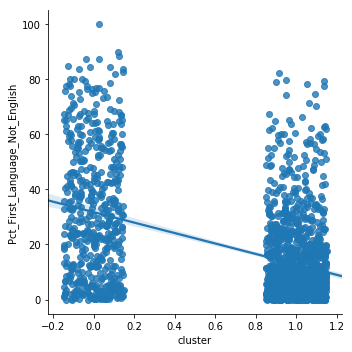

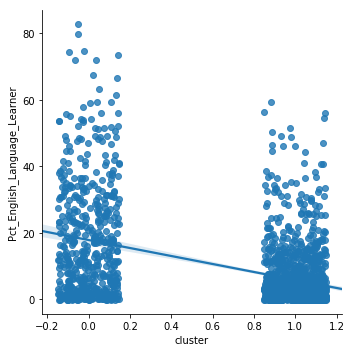

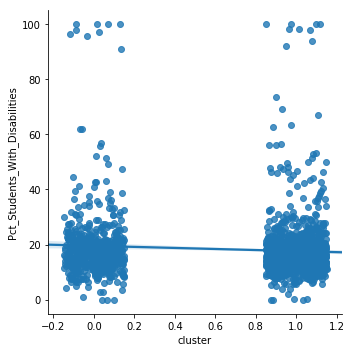

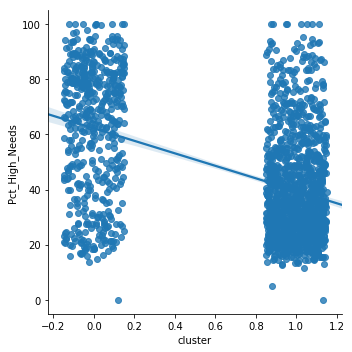

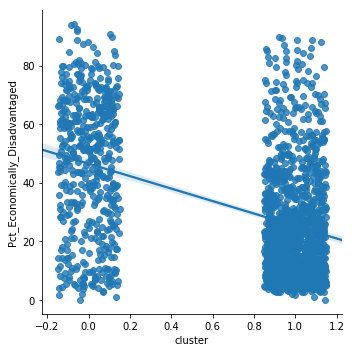

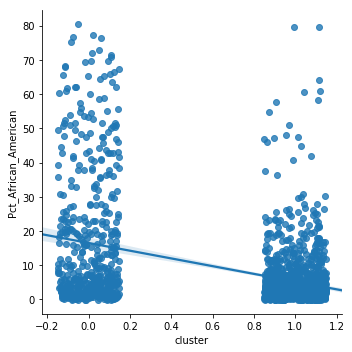

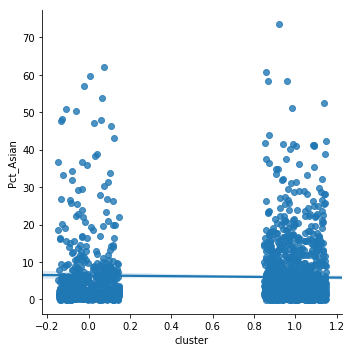

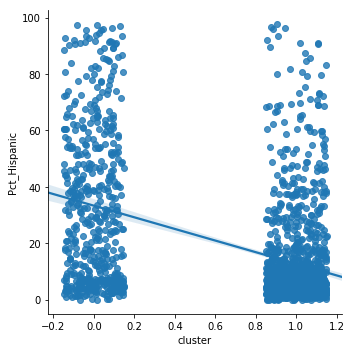

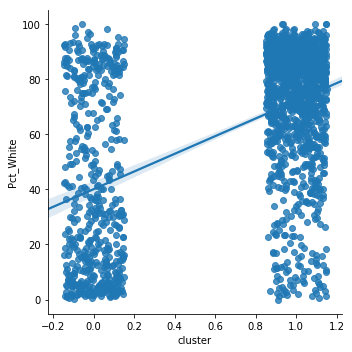

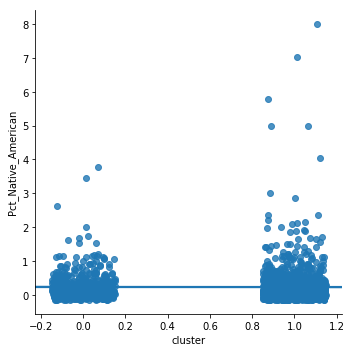

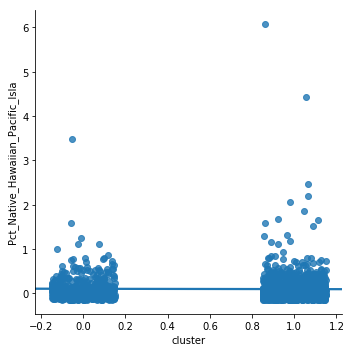

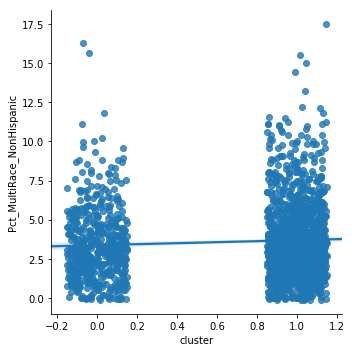

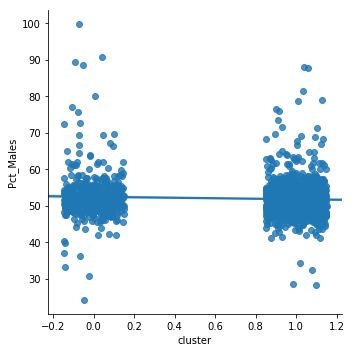

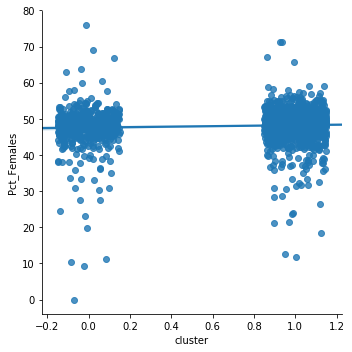

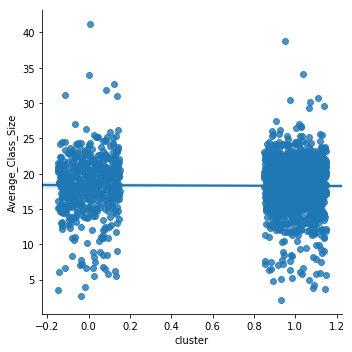

In [9]:
# get list of column names without cluster
columns = list(df.columns)
columns.remove('cluster')
# for each of the columns, plot the profile of that data
for column in columns:
    sns.lmplot('cluster', column, df, x_jitter=.15, y_jitter=.15)

In [10]:
split = df.groupby('cluster')
cluster1 = split.get_group(0)
cluster2 = split.get_group(1)

In [11]:
# get means of the clusers
df.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0.0,31.690962,17.871538,19.532885,62.185385,46.490577,16.506923,6.408846,33.303462,40.076923,0.234231,0.102692,3.371346,52.426538,47.570192,18.376346
1.0,12.760582,5.863336,17.626436,39.555704,25.222581,5.219827,5.931707,12.689300,72.140283,0.231471,0.095673,3.691739,51.758615,48.234697,18.280488


In [12]:
# get variances of the clusters
df1.groupby('cluster').var()

""
cluster


## The mean values for "Pct_African_American" in each cluster. Also visualize it.

In [13]:
df.groupby('cluster').mean()['Pct_African_American']

cluster
0.0    16.506923
1.0     5.219827
Name: Pct_African_American, dtype: float64

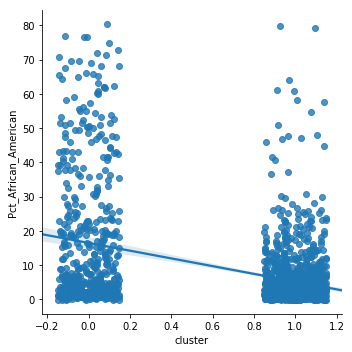

In [14]:
sns.lmplot('cluster', 'Pct_African_American', df, x_jitter=.15, y_jitter=.15)

## Which of the following statement is TRUE?

a. Schools in cluster 1, on average, have a higher percentage of African American students?

b. Schools in cluster 2, on average, have a higher percentage of African American students?

A is true. Cluster 1 has 16.5% African American students while cluster 2 has 5.21%.

## The mean values for "Pct_First_Language_Not_English" in each cluster. Also visualize it.

In [15]:
df.groupby('cluster').mean()['Pct_First_Language_Not_English']

cluster
0.0    31.690962
1.0    12.760582
Name: Pct_First_Language_Not_English, dtype: float64

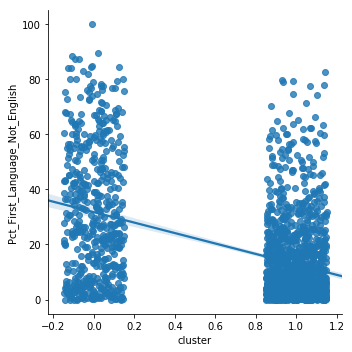

In [16]:
sns.lmplot('cluster', 'Pct_First_Language_Not_English', df, x_jitter=.15, y_jitter=.15)

## Which cluster has a higher percentage of economically disadvantaged students?

Cluster 1 has a higher percentage of economically disadvantaged students. Cluster 1 has 46.5% and cluster 2 has 25.2%.

# Build Decision Tree model (use the original data, not the normalized data)

- Do model building using decision tree algorithm
- Visualize and embed decision tree (in pdf) in Jupyter Notebook

In [17]:
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  

# reset index of rows
df = df.reset_index()
# initialize second list of bad rows
badRows2 = []
# go through each row
for index, row in df.iterrows():
    # if the cluster column has bad data, add to a list of bad rows
    if np.isnan(row['cluster']) or row['cluster'] not in [0.0,1.0]:
        badRows2.append(index)
# drop all of the bad rows
df = df.drop(df.index[badRows2])

X = df.drop(['cluster', 'index'], axis=1)
y = df['cluster']
    
# Create decision tree classifer object
dtc = DecisionTreeClassifier(random_state=0)

# Train model
model = dtc.fit(X, y)

# Create DOT data
dot_data = tree.export_graphviz(dtc, out_file=None, 
                                feature_names=list(X.columns),  
                                class_names=y.name)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
graph.write_pdf('decisionTree.pdf')

True

In [18]:
from IPython.display import IFrame
IFrame("decisionTree.pdf", width=900, height=800)

## Develop two decision rules from the decision tree you just created

#### Rule 1 - If percentage of white students less or equal to than 38.15%, percentage of African American students is less than or equal to 29.85, percentage of hispanic students is less than or equal to 11.95% and percentage of females is less than or equal to 42.55% then class is C.  
#### Rule 2 - If percentage of white students less or equal to than 38.15%, percentage of African American students is less than or equal to 29.85, percentage of hispanic students is less than or equal to 11.95%, percentage of females greater than 42.55% and percentage of students with disabilities is greater than 6.5, then class is L.

## Decision tree also shows the variables that are more important in creating clusters. Which variables are considered most important in this clustering analysis?

## Build randomforestclassifier model for feature importance 

In [19]:
from sklearn.ensemble import RandomForestClassifier
import operator
np.random.seed(0) # setting random seed to get the same results each time
# perform random forest classifier
rfc = RandomForestClassifier(n_jobs=2, random_state=0)
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Which variables are considered least important in this clustering analysis?

In [20]:
# Get sorted list of feature importances least to greatest
feat_imp = list(zip(X, rfc.feature_importances_))
feat_imp = sorted(feat_imp, key = lambda x: x[1])
# print the list
for feat, imp in feat_imp:
    print(feat + ' : ' + str(imp))

Pct_Native_Hawaiian_Pacific_Isla : 0.01493097416063265
Pct_Native_American : 0.02266164566800246
Average_Class_Size : 0.042400932294117705
Pct_Males : 0.043537973998455506
Pct_Females : 0.04669845688454833
Pct_MultiRace_NonHispanic : 0.047073744851877576
Pct_Asian : 0.051572291936006806
Pct_Students_With_Disabilities : 0.06411836865265133
Pct_African_American : 0.06590387683157316
Pct_First_Language_Not_English : 0.0760300188178403
Pct_English_Language_Learner : 0.08827282326653776
Pct_High_Needs : 0.09177271401865145
Pct_Economically_Disadvantaged : 0.09368109607553202
Pct_White : 0.11165067607748522
Pct_Hispanic : 0.1396944064660877


## Is the "average class size" considered important in this clustering analysis? Explain why.

No, it is the third least important coming in with a feature importance value of just 4.24%.

## Based on decision rules from decision tree, the rule says: "if Pct_white < 46.95 AND Pct_Economically_Disadvantaged < 30.75 AND  Pct_First_Language_Not_English < 43.45"

# Clustering analysis using AgglomerativeClustering (# of clusters = 2)

In [21]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(1) # setting random seed to get the same results each time
# perform agglomerative clustering
agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 0, 1, 1])

## Visualize dendrogram

- p = 2

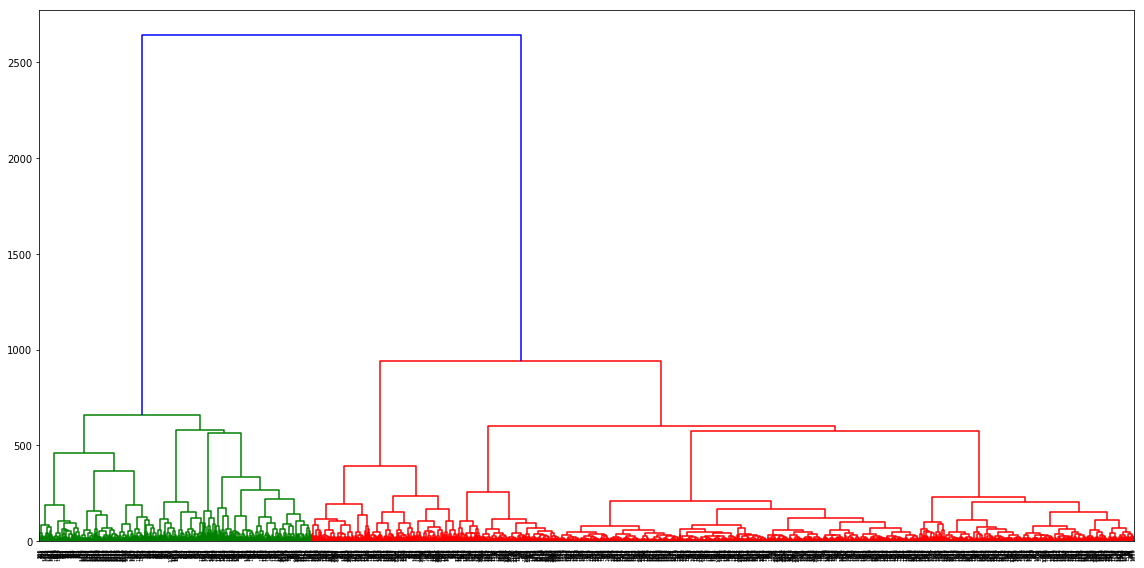

In [22]:
# plot the dendogram
plt.figure(figsize=(16,8))
linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

## How many observations are in each cluster?

In [23]:
# create dataframe
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
# get counts
df1.groupby('cluster').size()

cluster
0    1346
1     445
dtype: int64

## What is the profile of each cluster?

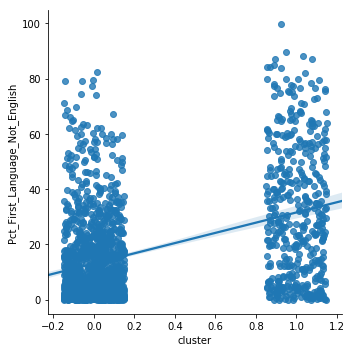

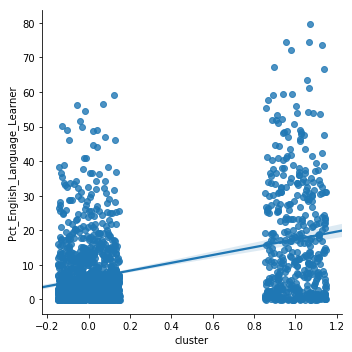

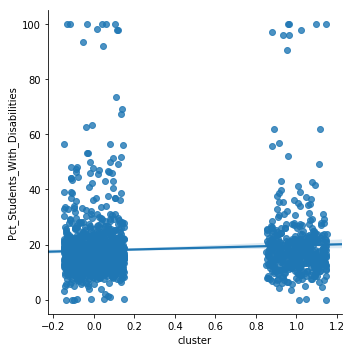

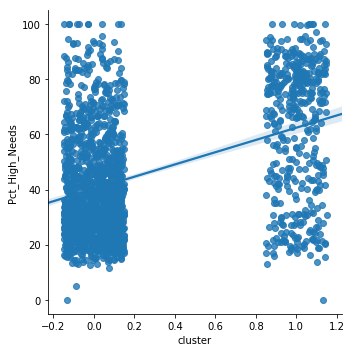

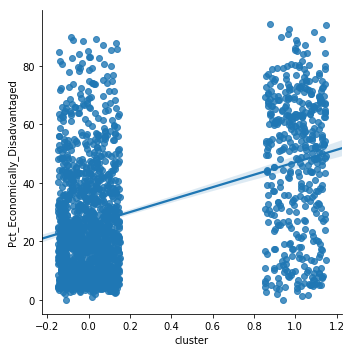

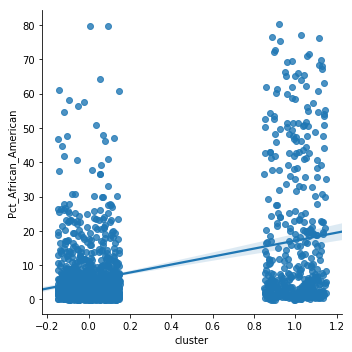

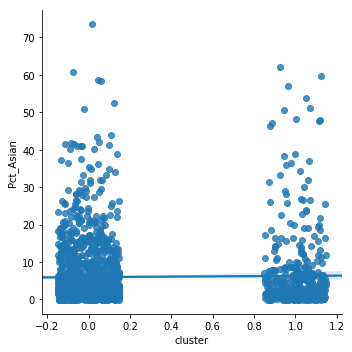

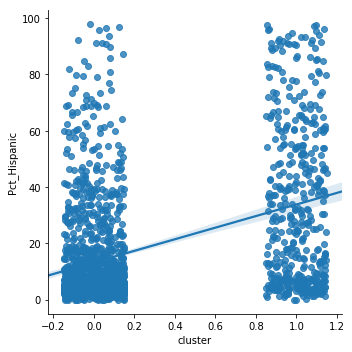

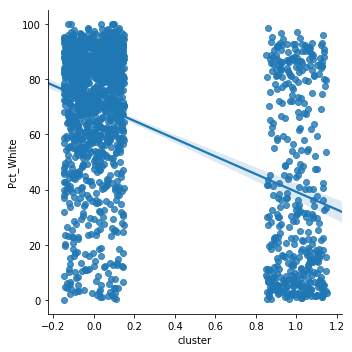

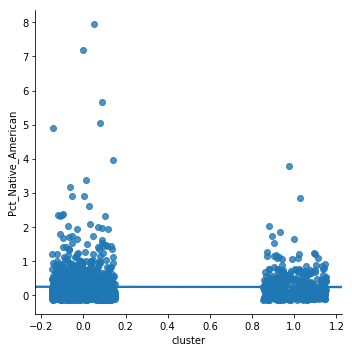

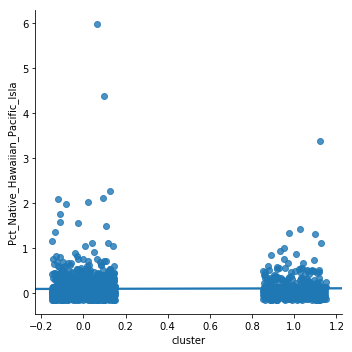

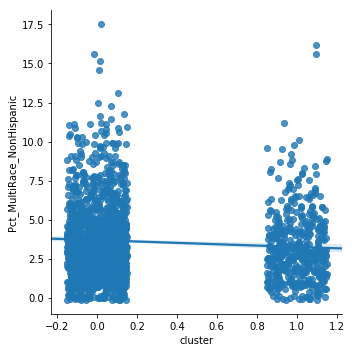

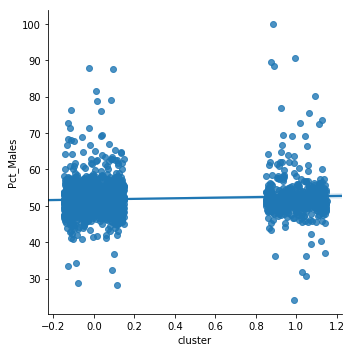

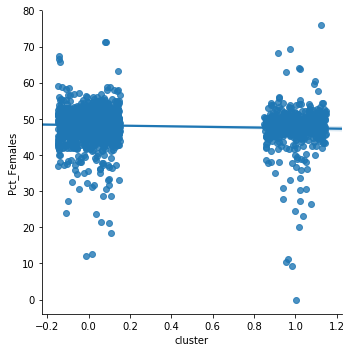

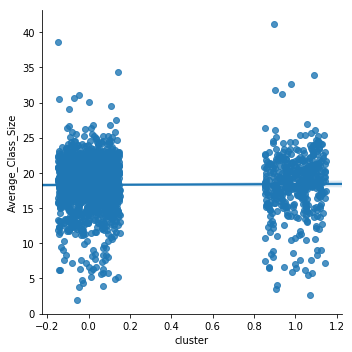

In [24]:
# combine dataframe with original data
df1 = pd.read_csv('schools.csv').drop(['School_Code','School_Name'],1).join(df1)
# get list of column names without cluster
columns = list(df1.columns)
columns.remove('cluster')
# for each of the columns, plot the profile of that data
for column in columns:
    sns.lmplot('cluster', column, df1, x_jitter=.15, y_jitter=.15)

In [25]:
# get means of the clusers
df1.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0.0,13.065525,6.079523,17.812509,40.209010,25.728518,5.535443,5.963068,13.224125,71.258228,0.236188,0.097617,3.685406,51.744751,48.248995,18.296974
1.0,31.557692,17.366742,19.678959,62.416968,47.050452,17.147738,6.292534,33.804299,39.169231,0.231222,0.107692,3.252489,52.543665,47.452715,18.406178


In [26]:
# get variances of the clusters
df1.groupby('cluster').var()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0.0,224.481456,79.197263,113.836788,361.391282,348.681489,71.371261,70.145103,291.911772,521.302211,0.296514,0.089637,6.060368,21.314784,21.342516,14.391028
1.0,581.301766,289.980003,195.343071,591.931344,574.625680,429.422999,105.860874,815.238417,1105.291795,0.143513,0.067016,5.362817,42.363418,42.319777,20.170122


Note: Several questions have been adapted from "SAS Enterprise Miner Exercise and Assignment Workbook by Varol Onur Kayhan"